In [1]:
import pandas as pd
import scipy.sparse as ss
import csv
import numpy as np
import os
import shutil
import sys
import time
import datetime
import Metrics
import math
from Utils import *
from Param import *
import matplotlib.pyplot as plt

HISTORYDAY = 7
DAYTIMESTEP = 210


Bad key text.latex.unicode in file /home/jiang/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/jiang/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/jiang/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://gi

In [2]:
# read data
daystartt = datetime.datetime.strptime(DAYSTART, '%H:%M') 
dayendt = datetime.datetime.strptime(DAYEND, '%H:%M') 
day_minutes = int((dayendt - daystartt).total_seconds()/60)  #每天有多少分钟的数据
day_total_step = math.ceil(day_minutes/TIME_INTERVAL)   #对应每天有多少个step
data_in,data_out = read_file(TIME_INTERVAL,DATA_START_DAY,DATA_END_DAY,DAYSTART,DAYEND)  #data数据读取，并且截取 1号到 25号， 06:00 到 23:30的数据

In [3]:
data_in.shape, data_out.shape

((5250, 81), (5250, 81))

In [9]:
data = np.concatenate([data[:, :, np.newaxis] for data in [data_in.values, data_out.values]], axis=-1)
data.shape

(5250, 81, 2)

In [10]:
data = data.transpose(0,2,1).reshape(data.shape[0], -1)
data.shape

(5250, 162)

In [24]:
data1 = np.concatenate([data_in.values, data_out.values], axis=0)
data1.shape

(10500, 81)

10.412583471924947 -1.8442793387201841


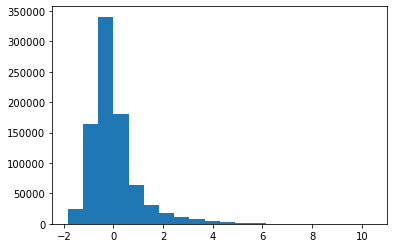

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1_norm = scaler.fit_transform(data1)
print(np.max(data1_norm), np.min(data1_norm))
# -1.9611035916030168 6.9133674780171415 -2.2767091586861747 9.18291357527422
plt.hist(data1_norm.ravel(), bins=20)
plt.show()

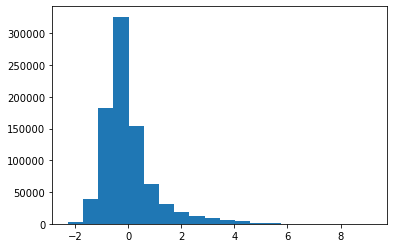

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)
np.max(data_norm), np.min(data_norm)
# -1.9611035916030168 6.9133674780171415 -2.2767091586861747 9.18291357527422
plt.hist(data_norm.ravel(), bins=20)
plt.show()

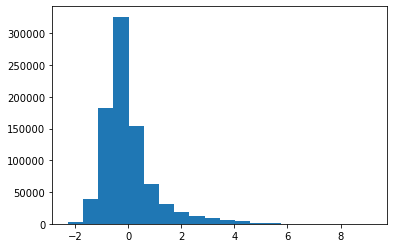

In [20]:
scaler = StandardScaler()
data_in_nor = scaler.fit_transform(data_in)
data_out_nor = scaler.fit_transform(data_out)
data_norm_yd = np.concatenate([data_in_nor, data_out_nor], axis=-1)
plt.hist(data_norm_yd.ravel(), bins=20)
plt.show()

In [22]:
print(data_norm)

[[-0.93345182 -0.68651179 -1.16846359 ... -1.28403317 -1.60516171
  -1.13306183]
 [-0.83256657 -0.61138596 -1.15343621 ... -1.28403317 -1.60516171
  -1.13306183]
 [-0.83256657 -0.58634401 -1.04824452 ... -1.2520314  -1.55011681
  -1.13306183]
 ...
 [-1.05451412 -0.76163762 -1.21354575 ... -0.96401541 -1.38498211
  -0.58393053]
 [-1.05451412 -0.73659568 -1.21354575 ... -0.99601719 -0.94462291
  -1.0781487 ]
 [-1.05451412 -0.78667957 -1.19851836 ... -1.01201807 -1.21984741
  -0.69375679]]


In [23]:
print(data_norm_yd)

[[-0.93345182 -0.68651179 -1.16846359 ... -1.28403317 -1.60516171
  -1.13306183]
 [-0.83256657 -0.61138596 -1.15343621 ... -1.28403317 -1.60516171
  -1.13306183]
 [-0.83256657 -0.58634401 -1.04824452 ... -1.2520314  -1.55011681
  -1.13306183]
 ...
 [-1.05451412 -0.76163762 -1.21354575 ... -0.96401541 -1.38498211
  -0.58393053]
 [-1.05451412 -0.73659568 -1.21354575 ... -0.99601719 -0.94462291
  -1.0781487 ]
 [-1.05451412 -0.78667957 -1.19851836 ... -1.01201807 -1.21984741
  -0.69375679]]


In [4]:
def get_timestamps(start, end):
    DAYS = [date.strftime('%Y-%m-%d') for date in pd.date_range(start, end, freq='1D')]
    TIMESTAMPS = []
    for day in DAYS:
        timestamp = [date.strftime('%Y-%m-%d %H:%M:%S') for date in pd.date_range(start=day + ' 06:00:00', end=day + ' 23:25:00', freq='{}min'.format(TIME_INTERVAL))]
        TIMESTAMPS.extend(timestamp)
    return TIMESTAMPS
ALL = get_timestamps('2019-01-01', '2019-01-25')
PART = get_timestamps('2019-01-18', '2019-01-24')
START_INDEX, END_INDEX = ALL.index(PART[0]),  ALL.index(PART[-1])
print(START_INDEX, END_INDEX)

1785 2519


(735, 3)


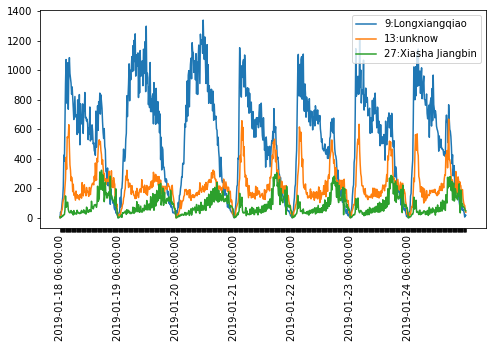

In [20]:
# Xiasha Jiangbin
test_data = data_out.values[START_INDEX:END_INDEX+1, [9,13,27]]
print(test_data.shape)
plt.figure(figsize =(8, 4)) 
plt.plot(test_data)
plt.legend(loc="best", labels=['9:Longxiangqiao','13:unknow','27:Xiasha Jiangbin'])
ticks = PART
ticks = [ticks[i] if i%105==0 else '' for i in range(len(ticks))]
plt.xticks(np.arange(test_data.shape[0]), ticks, rotation=90)
plt.show()

(735,)


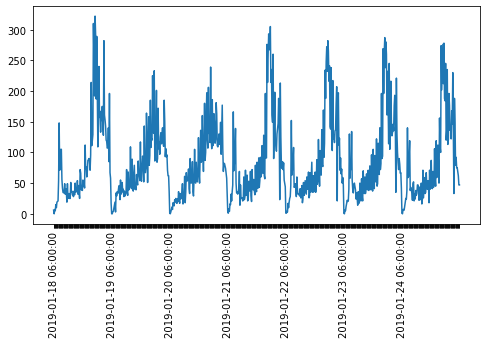

In [17]:
# Xiasha Jiangbin
test_data = data_out.values[START_INDEX:END_INDEX+1, 27]
print(test_data.shape)
plt.figure(figsize =(8, 4)) 
plt.plot(test_data)
ticks = PART
ticks = [ticks[i] if i%105==0 else '' for i in range(len(ticks))]
plt.xticks(np.arange(test_data.shape[0]), ticks, rotation=90)
plt.show()

(735,)


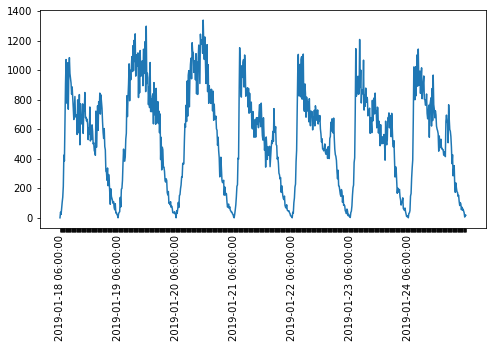

In [16]:
# Longxiangqiao
test_data = data_out.values[START_INDEX:END_INDEX+1, 9]
print(test_data.shape)
plt.figure(figsize =(8, 4)) 
plt.plot(test_data)
ticks = PART
ticks = [ticks[i] if i%105==0 else '' for i in range(len(ticks))]
plt.xticks(np.arange(test_data.shape[0]), ticks, rotation=90)
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler1 = StandardScaler()
scaler2 = StandardScaler()
data_in_nor = scaler.fit_transform(data_in)
data_out_nor = scaler.fit_transform(data_out)
print(np.min(data_in_nor), np.max(data_in_nor), np.min(data_out_nor), np.max(data_out_nor))

-1.9611035916030168 6.9133674780171415 -2.2767091586861747 9.18291357527422


In [54]:
data_in_nor1 = scaler1.fit_transform(data_in)
print(np.min(data_in_nor1), np.max(data_in_nor1))

-1.9611035916030168 6.9133674780171415


(array([3.24800e+03, 2.06030e+04, 6.43050e+04, 1.34831e+05, 9.90760e+04,
        4.22570e+04, 1.95170e+04, 1.10500e+04, 7.61400e+03, 5.80200e+03,
        4.71500e+03, 4.12100e+03, 3.27800e+03, 2.45000e+03, 1.36900e+03,
        6.54000e+02, 2.37000e+02, 8.80000e+01, 2.90000e+01, 6.00000e+00]),
 array([-1.96110359, -1.51738004, -1.07365648, -0.62993293, -0.18620938,
         0.25751418,  0.70123773,  1.14496128,  1.58868484,  2.03240839,
         2.47613194,  2.9198555 ,  3.36357905,  3.8073026 ,  4.25102616,
         4.69474971,  5.13847326,  5.58219682,  6.02592037,  6.46964392,
         6.91336748]),
 <BarContainer object of 20 artists>)

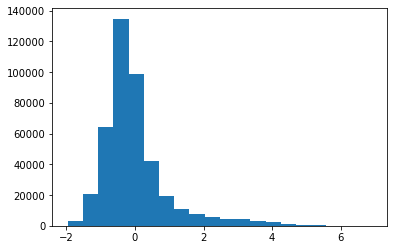

In [58]:
plt.hist(data_in_nor1.ravel(), bins=20)

In [55]:
data_out_nor1 = scaler2.fit_transform(data_out)
print(np.min(data_out_nor1), np.max(data_out_nor1))

-2.2767091586861747 9.18291357527422


(1470,)


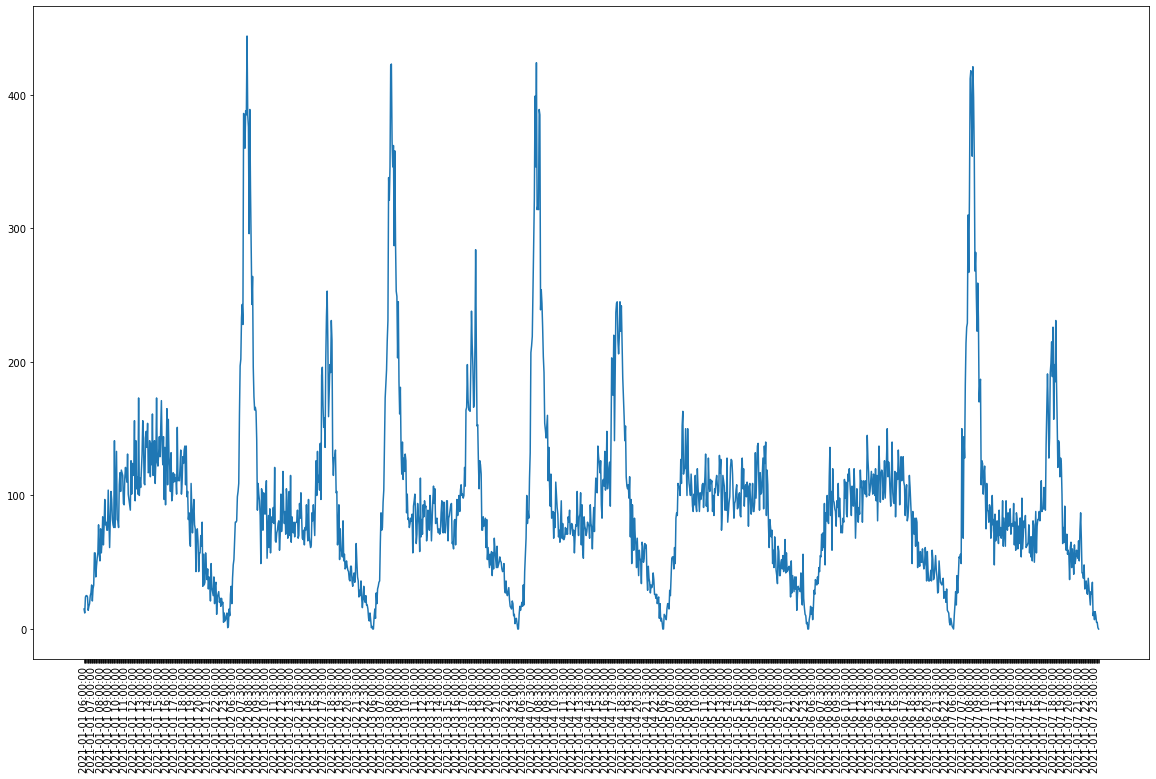

In [49]:
test_data = data_in.values[:len(TIMESTAMPS), 13]
print(test_data.shape)
plt.figure(figsize =(20, 12)) 
plt.plot(test_data)
ticks = TIMESTAMPS
ticks = [ticks[i] if i%12==0 else '' for i in range(len(ticks))]
plt.xticks(np.arange(test_data.shape[0]), ticks, rotation=90)
plt.show()

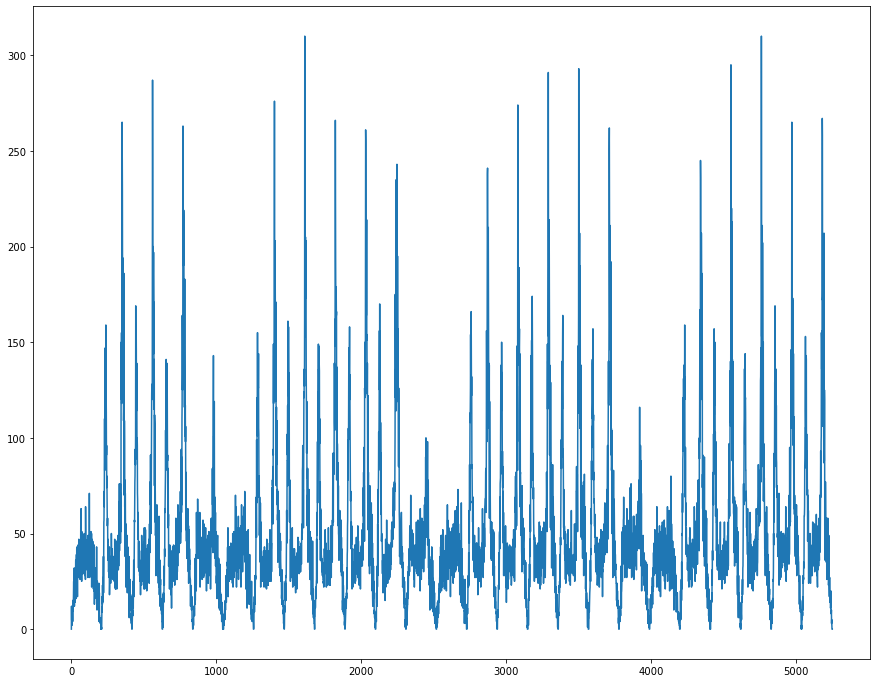

In [28]:
plt.figure(figsize =(15, 12))
plt.plot(data_in.values[:, [33]])

array([1, 2, 6])

(array([3.22126e+05, 7.14740e+04, 1.65930e+04, 6.90400e+03, 3.19800e+03,
        2.18000e+03, 1.33400e+03, 7.23000e+02, 3.55000e+02, 1.58000e+02,
        6.70000e+01, 2.60000e+01, 1.90000e+01, 1.60000e+01, 1.00000e+01,
        1.60000e+01, 1.80000e+01, 1.30000e+01, 1.40000e+01, 6.00000e+00]),
 array([   0.  ,   84.55,  169.1 ,  253.65,  338.2 ,  422.75,  507.3 ,
         591.85,  676.4 ,  760.95,  845.5 ,  930.05, 1014.6 , 1099.15,
        1183.7 , 1268.25, 1352.8 , 1437.35, 1521.9 , 1606.45, 1691.  ]),
 <BarContainer object of 20 artists>)

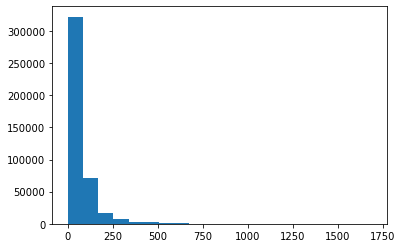

In [9]:
plt.hist(data_in.values.ravel(), bins=20)

In [3]:

if TASK is "in":
    data = data_in
else :
    data_in = data_in
    data_out = data_out
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_in_nor = scaler.fit_transform(data_in)
data_out_nor = scaler.fit_transform(data_out)
data_in_nor = data_in_nor.reshape(data_in_nor.shape[0],data_in_nor.shape[1],1)
data_out_nor = data_out_nor.reshape(data_out_nor.shape[0],data_out_nor.shape[1],1)
data_nor = np.concatenate((data_in_nor, data_out_nor), axis = 2)
#data 转换成sequence
# seq_data = datasetToSeq_daybyday(data_nor, INPUT_STEP,PRED_STEP, day_total_step, day=DATA_END_DAY-DATA_START_DAY+1)
seq_data = datasetToSeq(data_nor,INPUT_STEP,PRED_STEP)
seq_data = seq_data.transpose(0,3,1,2)
# seq_data shape is : samples * channel * (input_step+pred_step) * n_route   (5227, 2, 24, 81)
print('seq_data shape: ',seq_data.shape)

seq_data shape:  (5227, 2, 24, 81)
